## Useful code for processing test data

### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import glob

### Time test for files

In [2]:
MAX_MEASURES = 12

def show_time_plot_per_test(TEST_FILES, DUMMY_FILE, SOURCE_FILE_SIZE, title, output_file):
    with open(DUMMY_FILE) as file:
        dummy_values = np.array(file.read().split()).astype(float)

    df_time_duration = pd.DataFrame()

    for filename, plot_name in TEST_FILES:
        values = np.array([])
        with open(filename) as file:
            unclean_values = np.array(file.read().split()).astype(float)
            values = unclean_values #- dummy_values

            mask = np.ones(len(values), dtype=bool)
            mask[np.argmin(values)] = mask[np.argmax(values)] = False
            values = values[mask]

            # Take only the first 12 measures
            if len(values) > MAX_MEASURES:
                values = values[:MAX_MEASURES]

            # Divide all values by file size
            # values = values / SOURCE_FILE_SIZE

        df_time_duration[plot_name] = pd.DataFrame(values)

    axes = df_time_duration.boxplot(figsize=(8, 5), grid=False, showfliers=False)
    axes.grid(axis="y")
    name = "[1x10^11]" if "nasa" in filename else "[1x10^10]"
    axes.set_ylabel(f'CPU Cycles {name}')
    plt.tight_layout()

    plt.title(title)
    plt.savefig(output_file, bbox_inches='tight')
    plt.show()

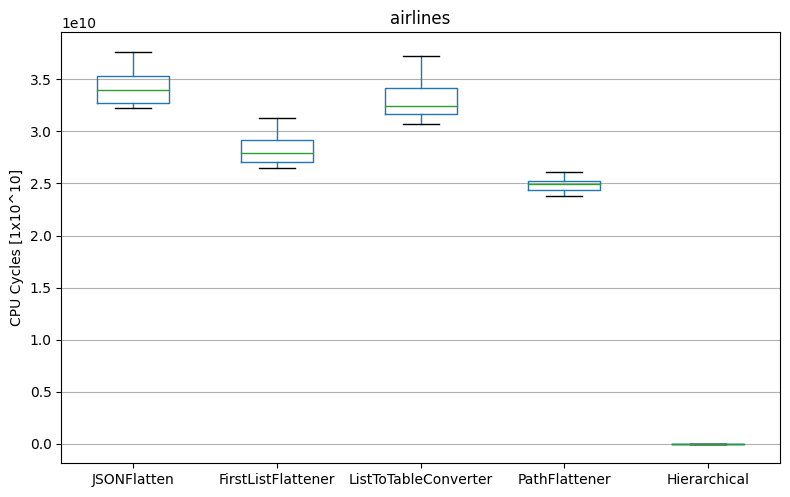

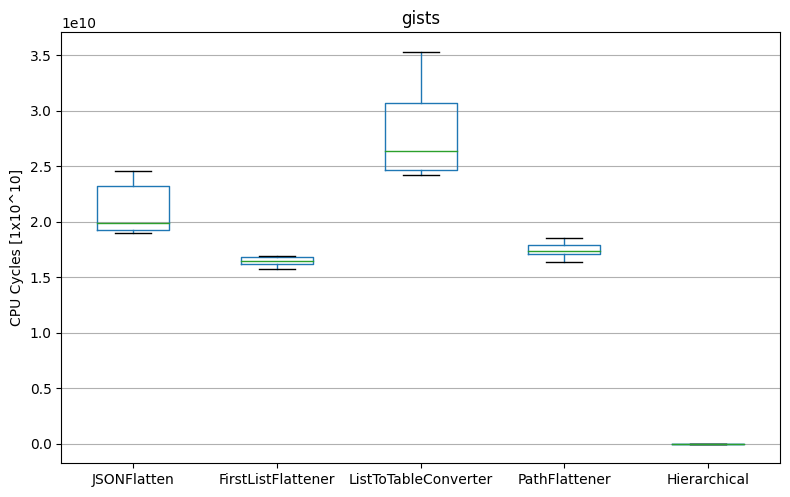

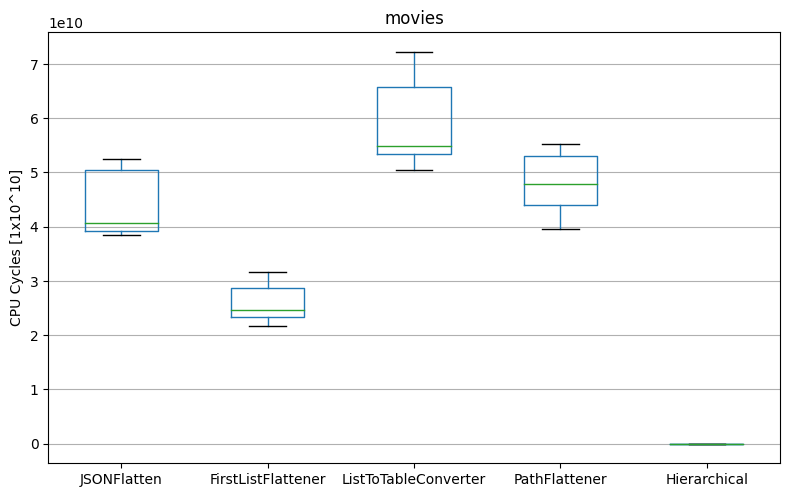

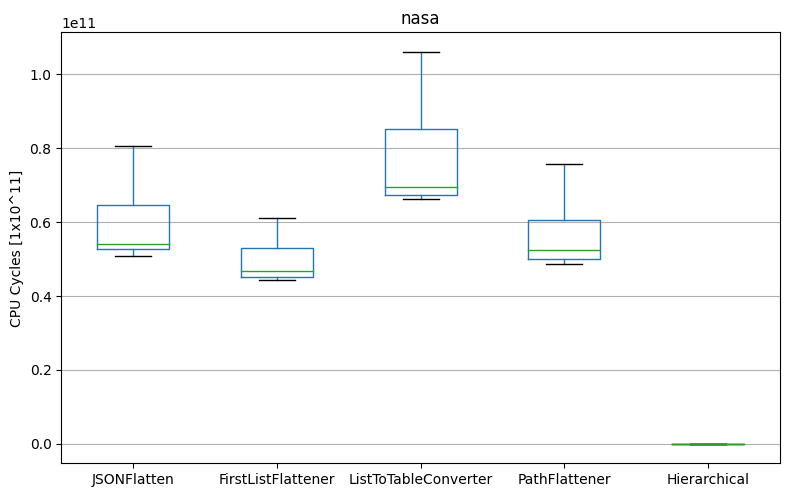

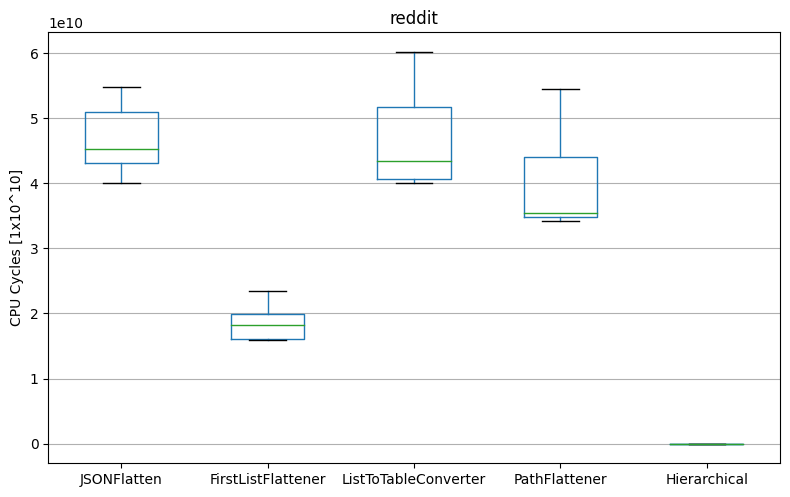

In [3]:
# TEST with files generated from ballooner PER TEST
test_names = [
    "airlines",
    "gists",
    "movies",
    "nasa",
    "reddit",
]

for test_name in test_names:
    SOURCE_FILE_SIZE = os.stat(f"../../data/testFiles/{test_name}.txt").st_size
    TEST_FILES = [
        (f"cpu/{test_name}-JSONFlatten.txt", "JSONFlatten"),
        (f"cpu/{test_name}-JSONFirstListFlattener.txt", "FirstListFlattener"),
        (f"cpu/{test_name}-JSONListToTableConverter.txt", "ListToTableConverter"),
        (f"cpu/{test_name}-JSONPathFlattener.txt", "PathFlattener"),
        (f"time/{test_name}-Hierarchical.txt", "Hierarchical"),
    ]
    DUMMY_FILE = f"cpu/{test_name}-JSONDummy.txt"
    output_file = f"cpu/charts/{test_name}.png"

    show_time_plot_per_test(TEST_FILES, DUMMY_FILE, SOURCE_FILE_SIZE, test_name, output_file)

# --------------------------

In [4]:
MAX_MEASURES = 12

def get_test_props(test_name: str):
    SOURCE_FILE_SIZE = os.stat(f"../../data/testFiles/{test_name}.txt").st_size
    TEST_FILES = [
        (f"cpu/{test_name}-JSONFlatten.txt", "JSONFlatten"),
        (f"cpu/{test_name}-JSONFirstListFlattener.txt", "FirstListFlattener"),
        (f"cpu/{test_name}-JSONListToTableConverter.txt", "ListToTableConverter"),
        (f"cpu/{test_name}-JSONPathFlattener.txt", "PathFlattener"),
        (f"cpu/{test_name}-Hierarchical.txt", "Hierarchical"),
    ]
    DUMMY_FILE = f"cpu/{test_name}-JSONDummy.txt"
    output_file = f"cpu/charts/{test_name}.png"

    return (TEST_FILES, DUMMY_FILE, SOURCE_FILE_SIZE, test_name, output_file)

def clear_values(DUMMY_FILE, filename, SOURCE_FILE_SIZE):
    with open(DUMMY_FILE) as file:
        dummy_values = np.array(file.read().split()).astype(float)

    values = np.array([])
    with open(filename) as file:
        unclean_values = np.array(file.read().split()).astype(float)
        values = unclean_values #- dummy_values

        mask = np.ones(len(values), dtype=bool)
        mask[np.argmin(values)] = mask[np.argmax(values)] = False
        values = values[mask]

        # Take only the first 12 measures
        if len(values) > MAX_MEASURES:
            values = values[:MAX_MEASURES]

        # Divide all values by file size
        # values = values / SOURCE_FILE_SIZE

    return values

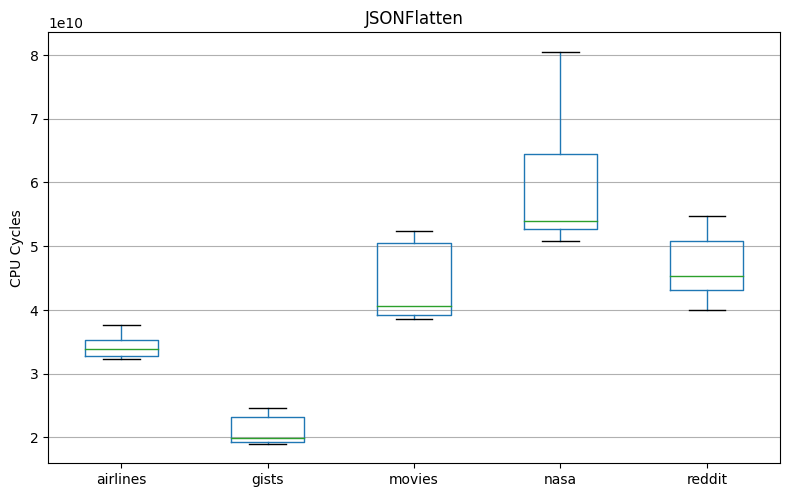

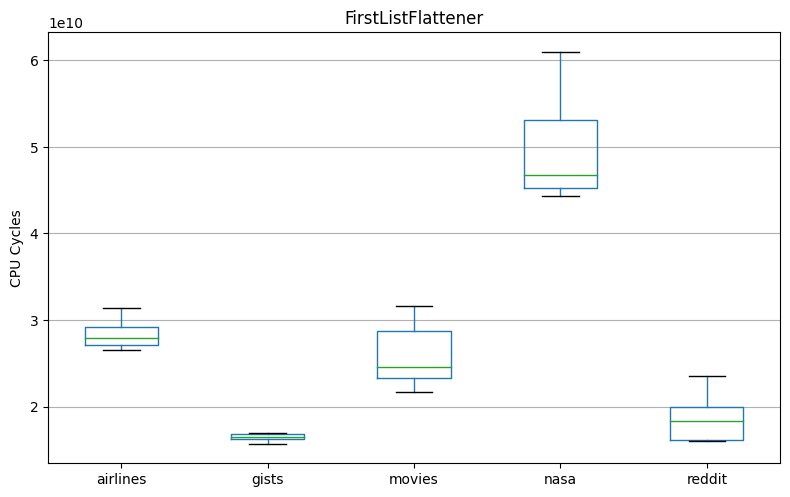

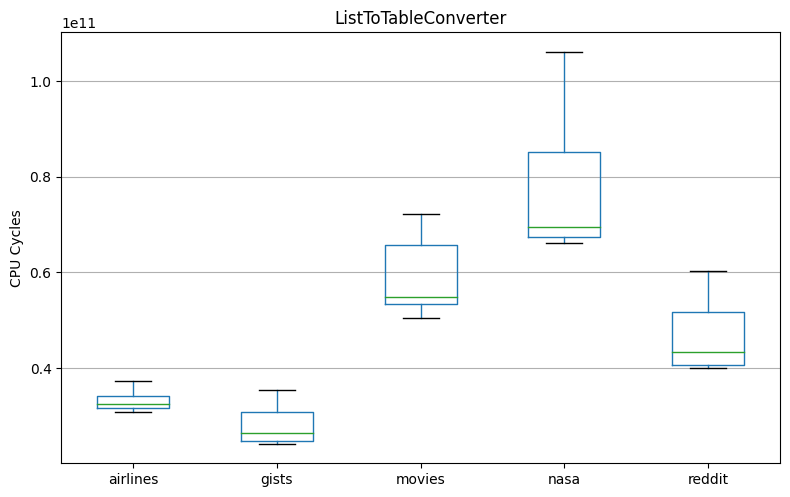

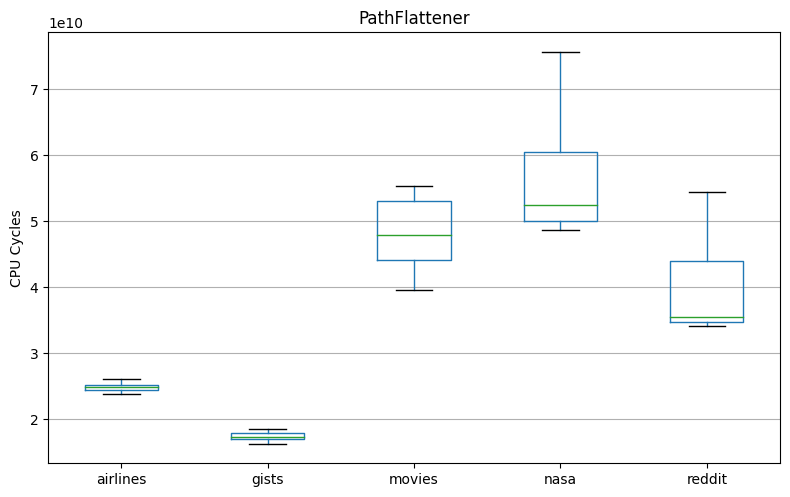

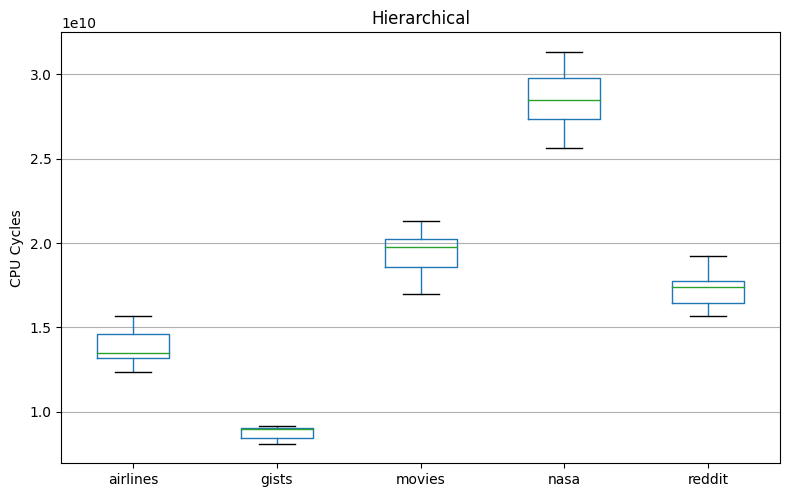

In [5]:
def time_plot_per_method():
    tests = [
        "airlines",
        "gists",
        "movies",
        "nasa",
        "reddit",
    ]

    data = {}
    for test in tests:
        (TEST_FILES, DUMMY_FILE, SOURCE_FILE_SIZE, title, output_file) = get_test_props(test)
        for filename, plot_name in TEST_FILES:
            if plot_name not in data:
                data[plot_name] = {}

            values = clear_values(DUMMY_FILE, filename, SOURCE_FILE_SIZE)
            data[plot_name][test] = values.copy()

    #print(data)

    df_time_duration = pd.DataFrame()
    for method in data.keys():
        for test in data[method].keys():
            df_time_duration[test] = data[method][test]

        axes = df_time_duration.boxplot(figsize=(8, 5), grid=False)
        axes.grid(axis="y")
        axes.set_ylabel('CPU Cycles')
        plt.tight_layout()

        plt.title(method)
        plt.savefig(f"cpu/charts/{method}.png")
        plt.show()

time_plot_per_method()

# ANALYZE ONLY

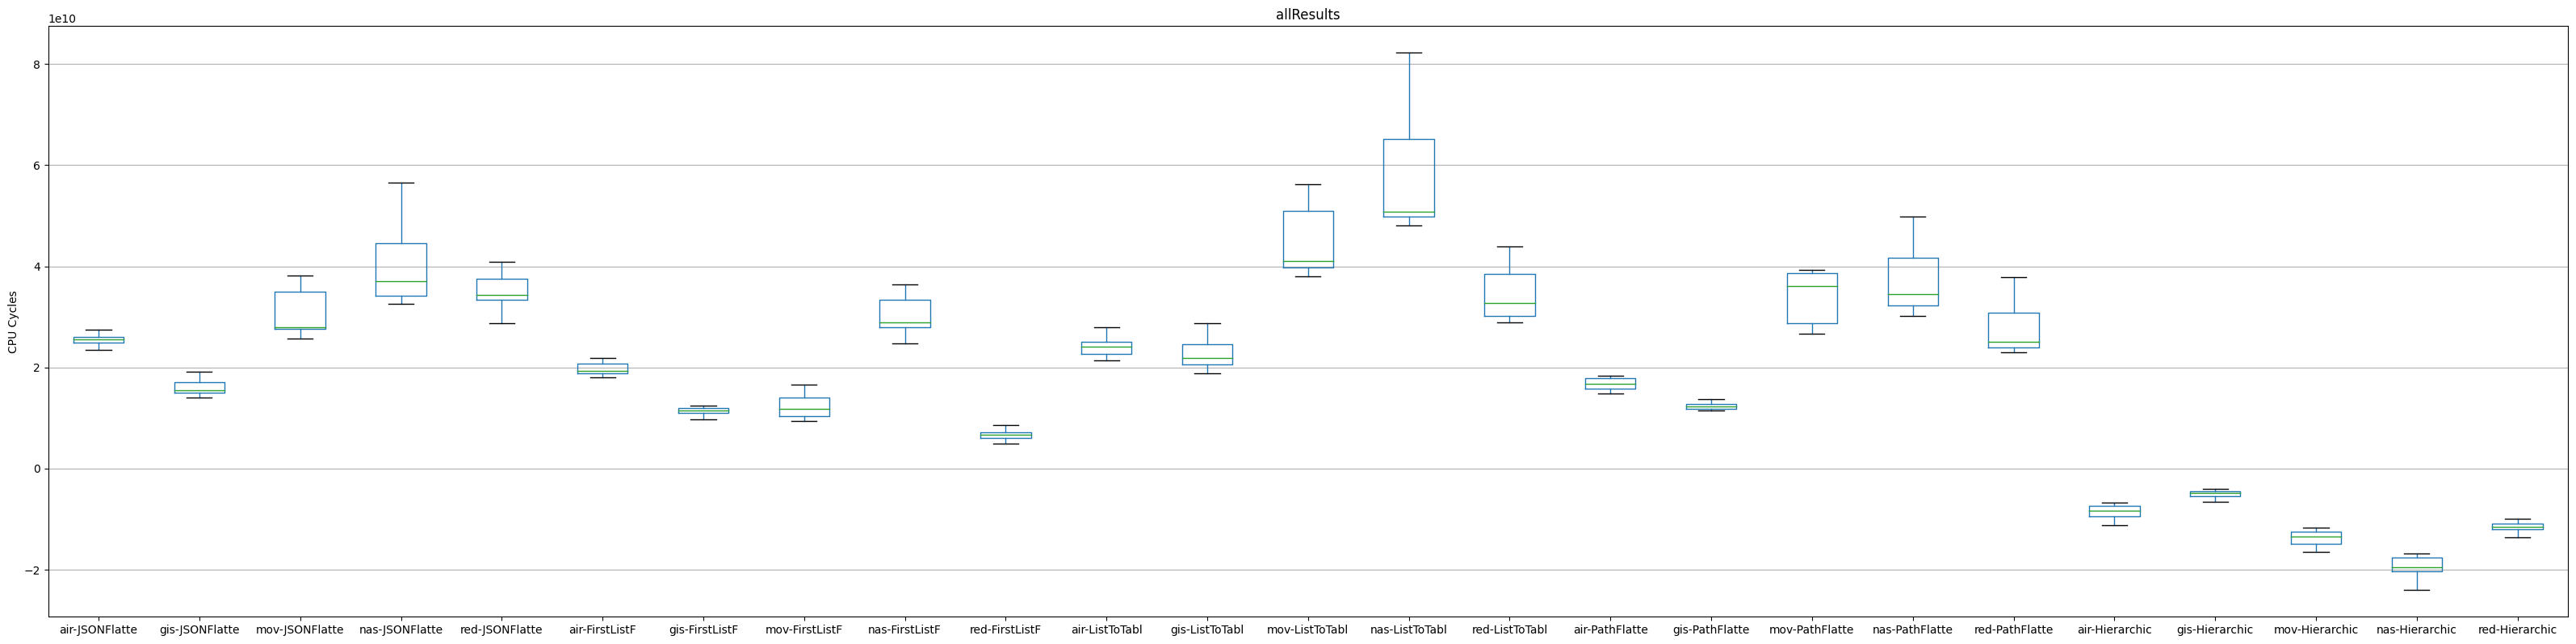

In [6]:
MAX_MEASURES = 12

def get_test_props(test_name: str):
    SOURCE_FILE_SIZE = os.stat(f"../../data/testFiles/{test_name}.txt").st_size
    TEST_FILES = [
        (f"cpu/{test_name}-JSONFlatten.txt", "JSONFlatten"),
        (f"cpu/{test_name}-JSONFirstListFlattener.txt", "FirstListFlattener"),
        (f"cpu/{test_name}-JSONListToTableConverter.txt", "ListToTableConverter"),
        (f"cpu/{test_name}-JSONPathFlattener.txt", "PathFlattener"),
        (f"time/{test_name}-Hierarchical.txt", "Hierarchical"),
    ]
    DUMMY_FILE = f"cpu/{test_name}-JSONDummy.txt"
    output_file = f"cpu/charts/{test_name}.png"

    return (TEST_FILES, DUMMY_FILE, SOURCE_FILE_SIZE, test_name, output_file)

def clear_values(DUMMY_FILE, filename, SOURCE_FILE_SIZE):
    with open(DUMMY_FILE) as file:
        dummy_values = np.array(file.read().split()).astype(float)

    values = np.array([])
    with open(filename) as file:
        unclean_values = np.array(file.read().split()).astype(float)
        values = unclean_values - dummy_values

        mask = np.ones(len(values), dtype=bool)
        mask[np.argmin(values)] = mask[np.argmax(values)] = False
        values = values[mask]

        # Take only the first 12 measures
        if len(values) > MAX_MEASURES:
            values = values[:MAX_MEASURES]

        # Divide all values by file size
        # values = values / SOURCE_FILE_SIZE

    return values

def time_plot_ALL():
    tests = [
        "airlines",
        "gists",
        "movies",
        "nasa",
        "reddit",
    ]

    data = {}
    for test in tests:
        (TEST_FILES, DUMMY_FILE, SOURCE_FILE_SIZE, title, output_file) = get_test_props(test)
        for filename, plot_name in TEST_FILES:
            if plot_name not in data:
                data[plot_name] = {}

            values = clear_values(DUMMY_FILE, filename, SOURCE_FILE_SIZE)
            data[plot_name][test] = values.copy()

    #print(data)

    df_time_duration = pd.DataFrame()
    for method in data.keys():
        for test in data[method].keys():
            df_time_duration[f"{test[0:3]}-{method[0:10]}"] = data[method][test]

    axes = df_time_duration.boxplot(figsize=(32, 8), grid=False, showfliers=False)
    axes.grid(axis="y")
    axes.set_ylabel('CPU Cycles')
    plt.tight_layout()

    plt.title("allResults")
    # plt.xticks(rotation=45)
    plt.savefig("cpu/charts/allResults.png")
    plt.show()

time_plot_ALL()